## Importing the modules for the project

In [1]:
import pandas as pd
import numpy as np 
import Recommenders as Recommenders
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df_triplets = pd.read_csv('/Chocolate/Dataset/triplets_file.csv')
df_songs_data= pd.read_csv('/Chocolate/Dataset/song_data.csv')

In [3]:
df_triplets.head(5)
# print(len(df_triplets))

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [4]:
df_songs_data.head(5)
# print(len(df_songs_data))

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### Combining both the dataset based on the Song_id (Unique & same value present in both the dataset)

In [5]:
df_songs = pd.merge(df_triplets, df_songs_data.drop_duplicates(['song_id']), on='song_id', how='left')
df_songs.head(5)

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [6]:
print(len(df_songs_data), len(df_triplets))

1000000 2000000


In [7]:
len(df_songs)

2000000

## Data pre-processing

In [8]:
df_songs['song'] = df_songs['title'] + ' - ' + df_songs['artist_name']
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [9]:
# comulative sum of listen count of the songs
song_grouped = df_songs.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,78
1,#40 - DAVE MATTHEWS BAND,338
2,& Down - Boys Noize,373
3,' Cello Song - Nick Drake,103
4,'97 Bonnie & Clyde - Eminem,93


In [10]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum) * 100
song_grouped.head()

,song,listen_count,percentage
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,78,0.00390
1,#40 - DAVE MATTHEWS BAND,338,0.01690
2,& Down - Boys Noize,373,0.01865
3,' Cello Song - Nick Drake,103,0.00515
4,'97 Bonnie & Clyde - Eminem,93,0.00465


In [11]:
#['listen_count', 'song']: It specifies the columns by which the DataFrame should be sorted. 
# First, it sorts by the 'listen_count' column in descending order (denoted by 0), meaning the largest numbers come first. 
# Then, if there are ties in the 'listen_count' column, it sorts those tied rows by the 'song' column in ascending order (denoted by 1), alphabetically.
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
7127,Sehr kosmisch - Harmonia,8277,0.41385
9084,Undo - Björk,7032,0.35160
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,0.34745
9880,You're The One - Dwight Yoakam,6412,0.32060
6774,Revelry - Kings Of Leon,6145,0.30725
...,...,...,...
3526,Historia Del Portero - Ricardo Arjona,51,0.00255
7071,Scared - Three Days Grace,51,0.00255
2147,Don´t Leave Me Now - Amparanoia,50,0.00250
2991,Ghosts (Toxic Avenger Mix) - Ladytron,48,0.00240


## Popularity recommendation model

In [12]:
pr = Recommenders.popularity_recommender_py()

In [13]:
pr.create(df_songs,'user_id', 'song')

In [14]:
recommended = pr.recommend(df_songs['user_id'][5])
recommended.head(10)

,user_id,song,score,Rank
7127,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,8277,1.0
9084,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,7032,2.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,6412,4.0
6774,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,6145,5.0
7115,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,5841,6.0
3613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,4795,8.0
3485,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,4758,9.0
8847,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,4548,10.0


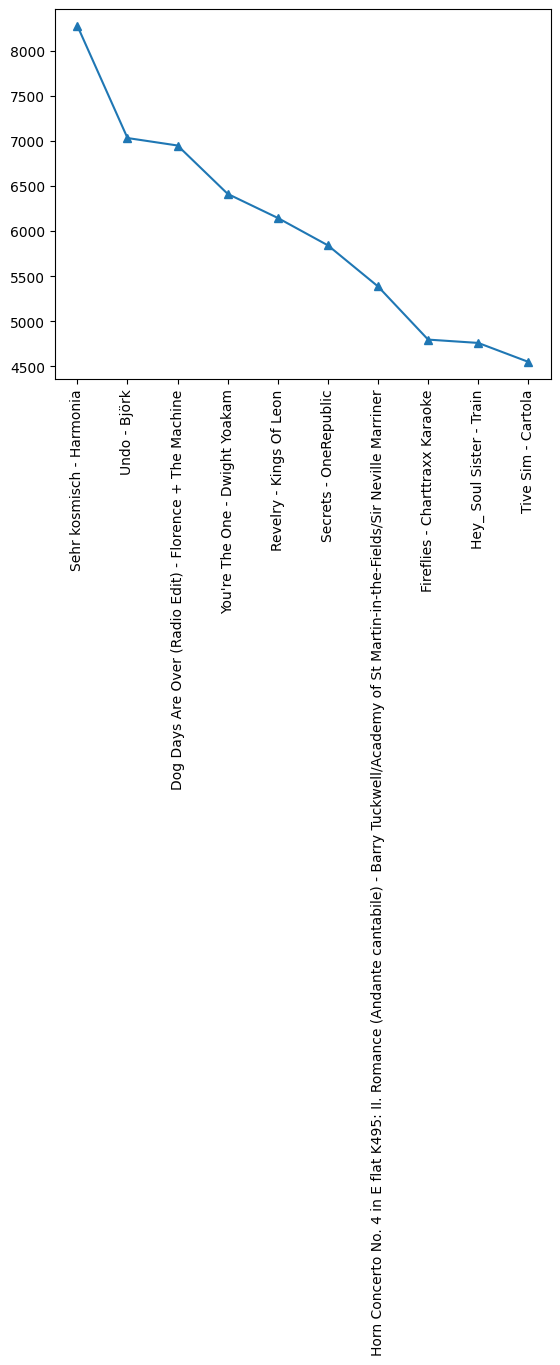

In [22]:
x = recommended['song']
y = recommended['score']

plt.plot(x,y, marker='^')
plt.title = 'Most popular songs!'
plt.xlabel = ('Songs')
plt.xticks(rotation=90)
plt.ylabel = ('Score')
plt.show()
# plt.scatter(x,y)

## Item similarity Recommendation Model

In [23]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(df_songs, 'user_id', 'song')

In [24]:
user_items = ir.get_user_items(df_songs['user_id'][5])

In [25]:
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [26]:
userRecommended = ir.recommend(df_songs['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :268460


In [27]:
ir.get_similar_items(['Stronger - Kanye West'])

no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :9181


,user_id,song,score,rank
0,,Homecoming - Kanye West,0.086178,1
1,,Flashing Lights - Kanye West,0.071470,2
2,,Good Life - Kanye West / T-Pain,0.066281,3
3,,Champion - Kanye West,0.065772,4
4,,Jesus Walks - Kanye West,0.064645,5
5,,Through The Wire - Kanye West,0.057659,6
6,,Forever - Drake / Kanye West / Lil Wayne / Eminem,0.055537,7
7,,Hey Mama - Kanye West,0.052300,8
8,,Gears - Future Rock,0.052004,9
9,,Diamonds From Sierra Leone - Kanye West / Jay-Z,0.051199,10


In [28]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(df_songs, 'user_id', 'year')

user_items = ir.get_user_items(df_songs['user_id'][1])

In [29]:
for user_item in user_items:
    print(user_item)

0
1976
2007
2005
1999
2008
2002
1989
2009
2001
2006
2003
1997


In [30]:
ir.recommend(df_songs['user_id'][5])

No. of unique songs for the user: 13
no. of unique songs in the training set: 58
Non zero values in cooccurence_matrix :754


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2004,0.363466,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2000,0.330124,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2010,0.302742,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1996,0.238274,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1995,0.220207,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1998,0.213779,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1992,0.210543,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1994,0.207011,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1990,0.201013,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1993,0.194595,10
